In [ ]:
# Install Java + Graphviz (PlantUML dependencies)
!apt-get -qq update
!apt-get -qq install -y openjdk-11-jre-headless graphviz >/dev/null

# Download PlantUML jar
!wget -q -O plantuml.jar https://downloads.sourceforge.net/project/plantuml/plantuml.jar

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [ ]:
import os, subprocess, uuid
from IPython.display import SVG, display

def render_puml(puml_text: str, out_name: str=None):
    """
    Renders PlantUML text to SVG and displays inline in Colab.
    Captures stderr for better error reporting.
    """
    if out_name is None:
        out_name = f"uml_{uuid.uuid4().hex}.svg"
    with open("tmp.puml", "w") as f:
        f.write(puml_text)
    # Capture stderr to diagnose PlantUML errors
    result = subprocess.run(["java", "-jar", "plantuml.jar", "-tsvg", "tmp.puml"], capture_output=True, text=True, check=True)
    if result.stderr:
        print("PlantUML STDERR:")
        print(result.stderr)
    os.rename("tmp.svg", out_name)
    display(SVG(filename=out_name))
    return out_name

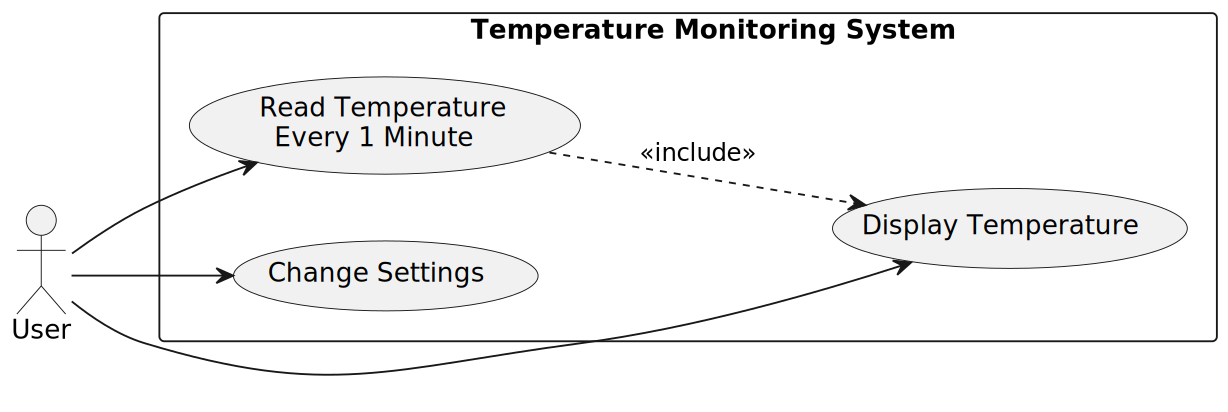

'uml_a745673e44664120b395c1f643c52207.svg'

In [ ]:
puml = r"""
@startuml
left to right direction
skinparam dpi 180
skinparam svgLimitSize false

actor "User" as U
rectangle "Temperature Monitoring System" {
  usecase "Read Temperature\nEvery 1 Minute" as UC_Read
  usecase "Display Temperature" as UC_Display
  usecase "Change Settings" as UC_Settings
}

U --> UC_Read
U --> UC_Display
U --> UC_Settings
UC_Read ..> UC_Display : <<include>>
@enduml
"""
render_puml(puml)


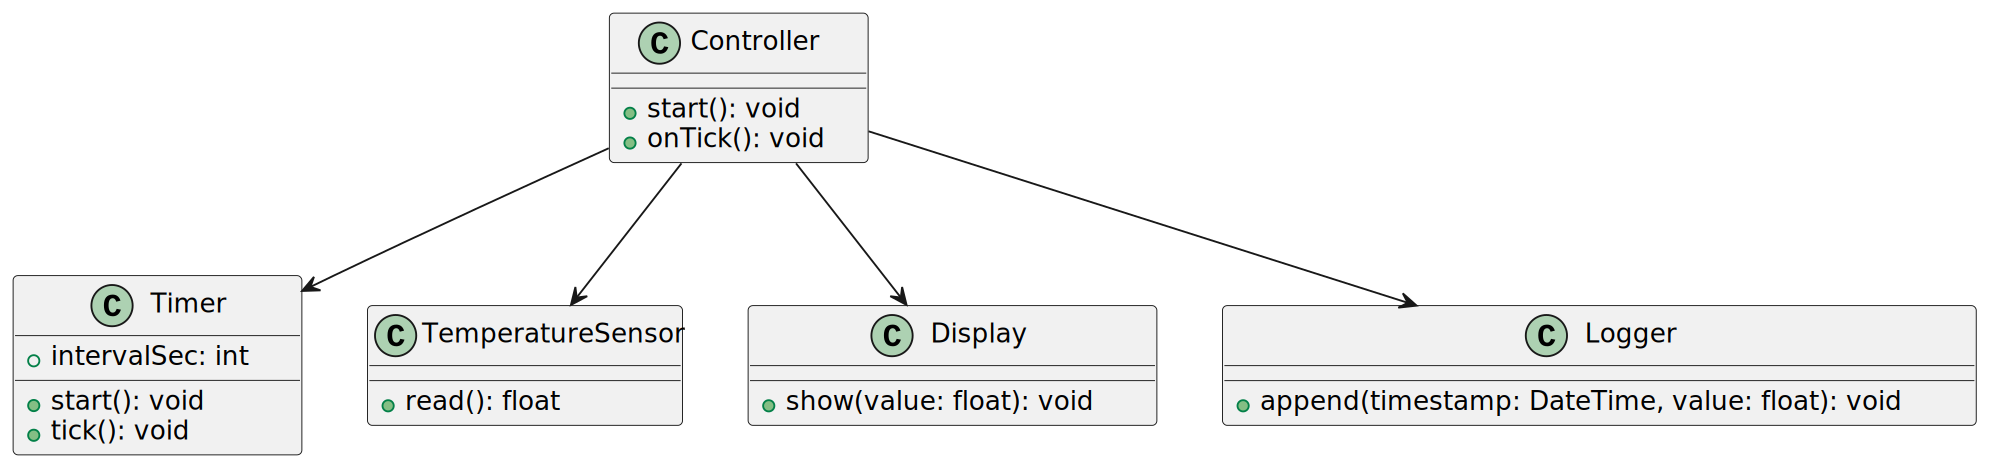

'uml_fef4302a6d894975bfa781d4237ef8fd.svg'

In [ ]:
puml = r"""
@startuml
skinparam dpi 180
skinparam svgLimitSize false

class Controller {
  +start(): void
  +onTick(): void
}

class Timer {
  +intervalSec: int
  +start(): void
  +tick(): void
}

class TemperatureSensor {
  +read(): float
}

class Display {
  +show(value: float): void
}

class Logger {
  +append(timestamp: DateTime, value: float): void
}

Controller --> Timer
Controller --> TemperatureSensor
Controller --> Display
Controller --> Logger
@enduml
"""
render_puml(puml)

In [ ]:
shared_defs = r"""
' ===== Shared elements for all diagrams =====
skinparam svgLimitSize false
skinparam dpi 180
skinparam shadowing false

' Common participants
actor "User" as U
participant "Controller" as C
participant "Timer" as T
participant "TemperatureSensor" as S
participant "Display" as D
participant "Logger" as L
"""
with open("uml_defs.puml", "w") as f:
    f.write(shared_defs)
print("Wrote uml_defs.puml")


Wrote uml_defs.puml


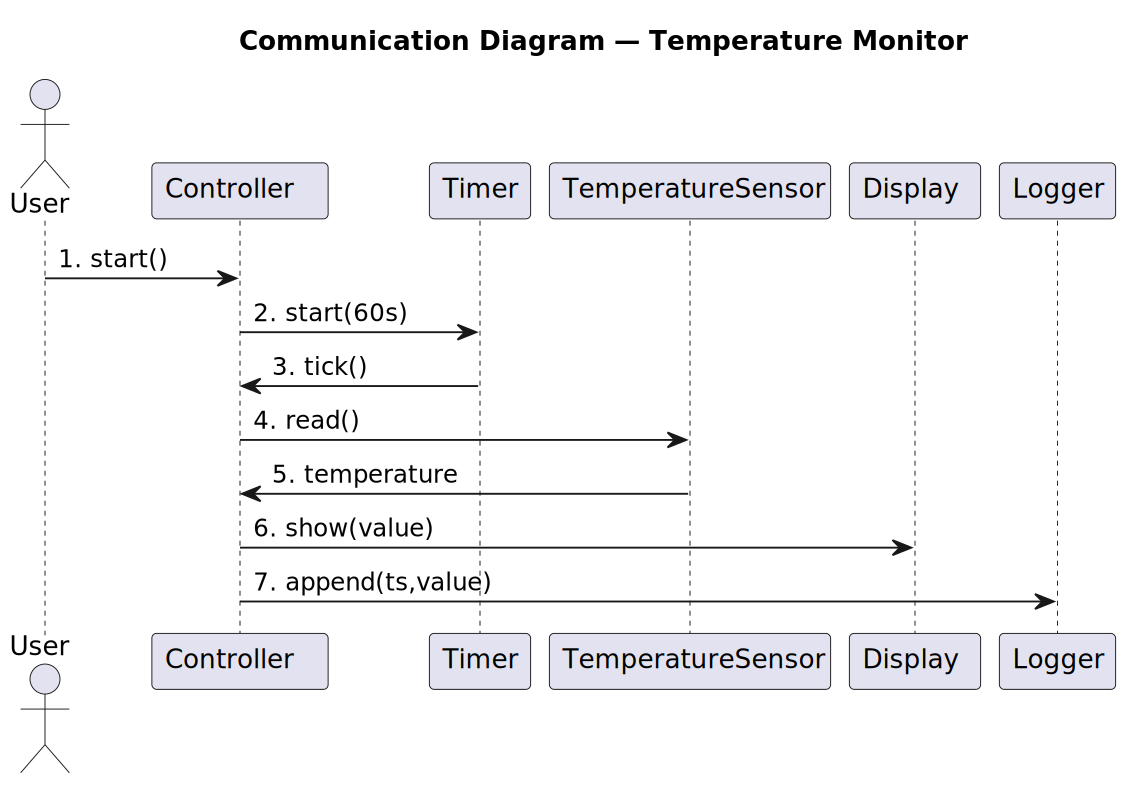

'uml_a5fcc9fe71254259bc40d4f2271b3397.svg'

In [ ]:
puml_comm = r"""
@startuml
!include uml_defs.puml
title Communication Diagram — Temperature Monitor

'UML communication emphasizes links; we number messages to indicate order:
U -> C : 1. start()
C -> T : 2. start(60s)
T -> C : 3. tick()
C -> S : 4. read()
S -> C : 5. temperature
C -> D : 6. show(value)
C -> L : 7. append(ts,value)
@enduml
"""
render_puml(puml_comm)

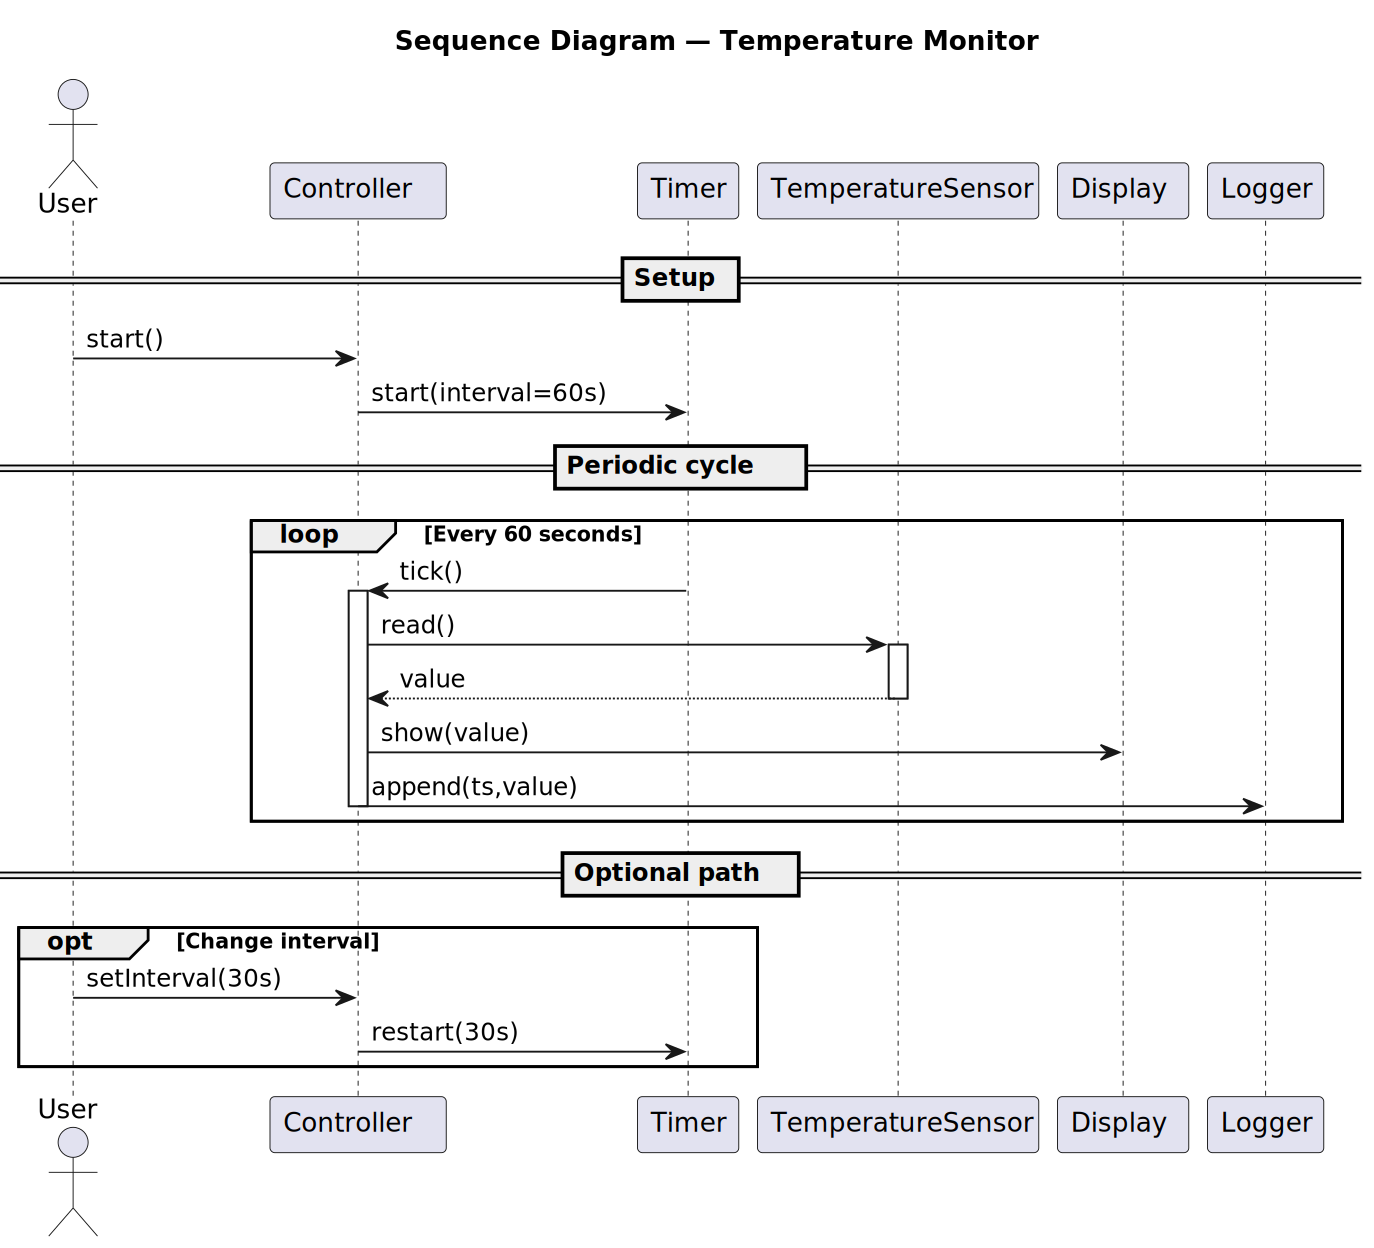

'uml_c1523bc116c84bb68f57dbc4d3f61ca9.svg'

In [ ]:
puml_seq = r"""
@startuml
!include uml_defs.puml
title Sequence Diagram — Temperature Monitor

== Setup ==
U -> C: start()
C -> T: start(interval=60s)

== Periodic cycle ==
loop Every 60 seconds
  T -> C: tick()
  activate C
  C -> S: read()
  activate S
  S --> C: value
  deactivate S
  C -> D: show(value)
  C -> L: append(ts,value)
  deactivate C
end

== Optional path ==
opt Change interval
  U -> C: setInterval(30s)
  C -> T: restart(30s)
end
@enduml
"""
render_puml(puml_seq)

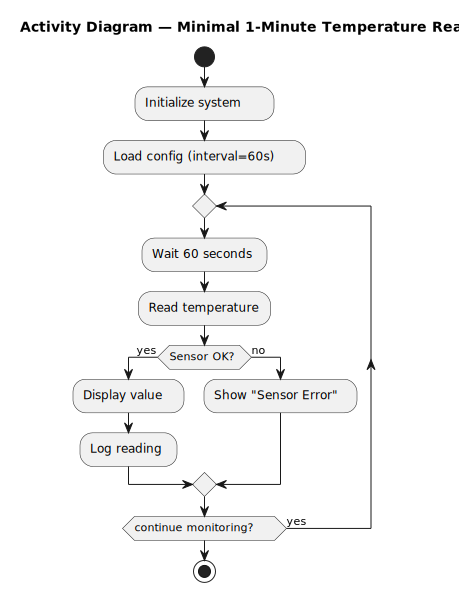

'uml_adbf209b9bfe49f1ae78b1a0b299f3c2.svg'

In [ ]:
puml = r"""
@startuml
title Activity Diagram — Minimal 1-Minute Temperature Read

start
:Initialize system;
:Load config (interval=60s);

repeat
  :Wait 60 seconds;
  :Read temperature;
  if (Sensor OK?) then (yes)
    :Display value;
    :Log reading;
  else (no)
    :Show "Sensor Error";
  endif
repeat while (continue monitoring?) is (yes)
stop
@enduml
"""
render_puml(puml)